# Amazon ratings

## 1. Accessing data

Our main Dataset is the Amazon one, that is based on its reviews for almost 20 years. It's about 20 GB, but, as we are going to complement it with some music Dataset, we think It's better using the cluster for all the work instead of mixing local and cluster work.

First thing we do is to explore data. We have many possibilities deppending on what we want to do, main files are:
* __Raw data__: with all the data from the Amazon's reviews, which is 20GB compressed and about 100GB decompressed.
* __Ratings only__: this iloe contains the ratings from reviews with some information such us the product identification(_asin_) but not the reviews text, which might be unnecessary for us.
* __5-core__: this one is as the fist one but only contains those reviews and users with more than 5 reviews, so it results in a smaller dataset, compressed it's 10GB.
* __5-core - By category__: this is the _5-core_ file divided by category so we can do our analysis by category instead of by products or reviewer without using metadata for that. 
* __Metadata__: which contains data about reviews as some _images_, _also bought products_, etc. It's about 3GB compressed and 10GB decompressed.

With this information we see wether we should work on our own computers or if we need to use the cluster. We do some tests with the raw data and the other files and we get some conclusions, as it was predicted, if we need data to be stored in memory we can't use our computers, but if we only need some pieces of information from this files, as we have others smaller (_the one's divided by category_) we can do it.

So after this test is about time to think which are going to be our questions for the project, to review the one's we had and to see if they are suitable with the actual knownledge. Also to decide if using the cluster would be a good option taking into account the pros and the cons.

Once we have done our exploratory analysis about data we are going to resume how data is and how we access. Mainly we have two types of data, the __ratings__ and the __metadata__ and we access them in a different way. 
* __ratings__ are in separated files, divided by the category of the product, their extension is _.csv_ and we load them in memory by using *import_csv* created by us.
* __metadata__ is an unique file that we rarely use so we don't allocate it on memory, when we want to access to some of its information we parse it with a _parse()_ function got from the data source.

Our accessing fuctions and imports needed are below, *import_csv(path, header)* and *parse(path)*.

In [1]:
import pandas as pd
import json
import gzip 
from collections import Counter
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join


In [2]:
#@param path
#    the path of the file we want to import
#@param headers
#    the names of the headers that the dataset will have
#@retun 
#    the dataset from the csv file
def import_csv(path, headers):
    return pd.read_csv(path, header=None, names=headers)

In [3]:
#@param path
#    the path of the file we want to import
#@retun 
#    the string to be converted to json with the object
def parse(path):
    g = gzip.open(path, 'r')
    for l in g: 
        yield json.dumps(eval(l))

# 2. Exploratory analysis

For the _ratings_ we need the headers that mainly are going to be the following and the list of files we are going to use:

In [4]:
# Path for the ratings files
#mypath_ratings="data/ratings" 
mypath_ratings="data/test"
# Getting files
rating_files = [f for f in listdir(mypath_ratings) if isfile(join(mypath_ratings, f))]
# Taking out the file extension
rating_categories = [x[8:-4].replace('_', ' ') for x in rating_files] 
# Headers as input to create the dataframes
headers = [ "reviewerID","asin","rating","timestamp"] 
#Number of categories
num_categories = len(rating_categories)

In [5]:
rating_df = [import_csv(mypath_ratings + '/' + file, headers) for file in rating_files]

ratings = list(zip(rating_categories, rating_df))

In [6]:
#How to access to dataframes in ratings 'df'

#ratings['category'][0 FOR name of category and 1 for df of the category].loc[row][column]

We are going to start by ploting main information to explore data.

### 2.1 Plotting data

In [7]:
# Initialize the variables needed
reviews_number_cat=[] # Number of reviews per category
reviews_products_cat=[] # Number of unique products per category

# We 
for i in range(0,len(rating_files)):
    reviews_number_cat.append(len(ratings[i][1]))
    reviews_products_cat.append(len(ratings[i][1]['asin'].unique()))

#### 2.1.1 Reviews per category

##### Absolute


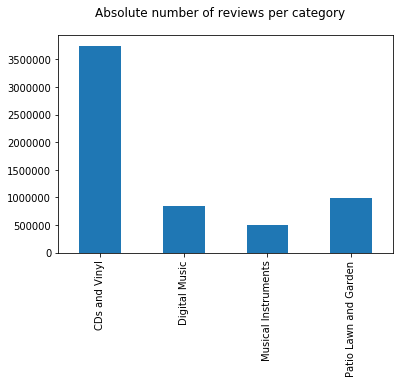

In [8]:
# Plots
fig, ax = plt.subplots()
fig.canvas.draw()

pd.DataFrame(reviews_number_cat)[0].plot(kind='bar')

fig.suptitle('Absolute number of reviews per category')
ax.set_xticklabels(rating_categories)

plt.show()

##### Relative

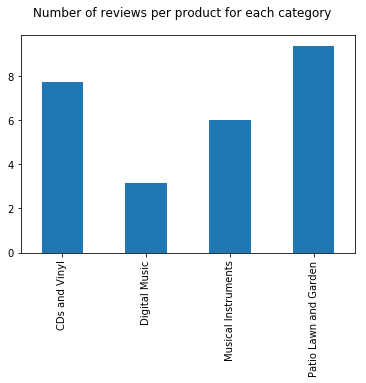

In [9]:
# The main difference with the previous one is that we need a set of the products per category to get its length so that we can divide  the number of reviews/number of differents products.
reviews_relative_cat = [reviews_number_cat[i]/reviews_products_cat[i] for i in range(0, len(reviews_number_cat))] # Relative number of reviews per product per category

# Plots
fig, ax = plt.subplots()
fig.canvas.draw()


pd.DataFrame(reviews_relative_cat)[0].plot(kind='bar')

fig.suptitle('Number of reviews per product for each category')
ax.set_xticklabels(rating_categories)

plt.show()

#### 2.1.2 Products per category

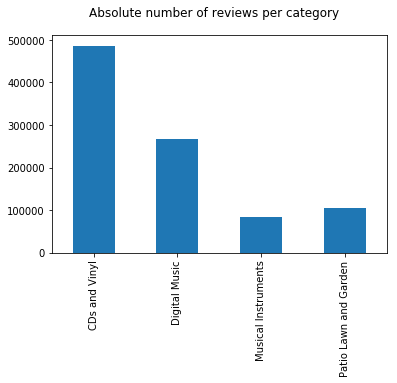

In [10]:
# Plots
fig, ax = plt.subplots()
fig.canvas.draw()

pd.DataFrame(reviews_products_cat)[0].plot(kind='bar')

fig.suptitle('Absolute number of reviews per category')
ax.set_xticklabels(rating_categories)

plt.show()

#### 2.1.3 Overall ratings results

##### Absolut values for all categories


In [11]:
overall_possibilities = 5
overall_frequency = [0]*overall_possibilities
for i in range(num_categories):
    c = Counter(ratings[i][1]['rating'].astype(int))
    for j in c.keys():
        overall_frequency[j.astype(int)-1] += c[j]

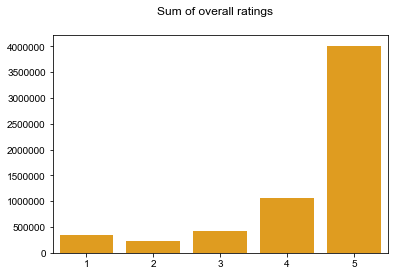

In [12]:
import seaborn as sns

fig, ax = plt.subplots()
fig.suptitle('Sum of overall ratings')

sns.set_style('darkgrid')

sns.barplot([1,2,3,4,5],overall_frequency, color='orange')

#plt.bar(range(0,overall_possibilities),overall_frequency,)
#ax.set_xticklabels([0,1,2,3,4,5])

plt.show()


##### Box plots

In [13]:
overall_cat=[]

for i in range(num_categories):
    overall_cat.append(ratings[i][1]['rating'])

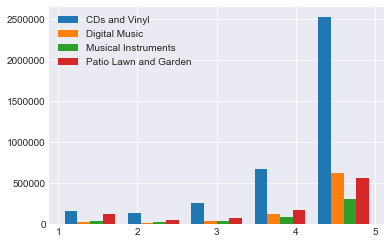

In [14]:
fig, ax=plt.subplots()
sns.set_style('whitegrid')
plt.hist(overall_cat, bins=5)
ax.set_xticks([1, 2 ,3 ,4, 5])
ax.legend(rating_categories)
plt.show()

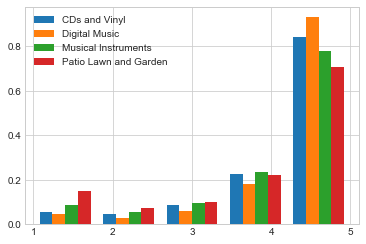

In [15]:
fig, ax=plt.subplots()
sns.set_style('white')
plt.hist(overall_cat, normed = True, bins=5)
ax.set_xticks([1, 2 ,3 ,4, 5])
ax.legend(rating_categories)

plt.show()

#### Q2: Relation between price of the product and the amount of reviews. 

Analysis of the relation between product prices and reviews:
     - prices are in the metadata.json.gz
     - number of reviews are in the rating_df

First, let's analyse the price distribution for different categories.

In [16]:
pricesMI = {}

for review in parse("data/metadata/meta_Musical_Instruments.json.gz"):
    review = json.loads(review)
    try:
        pricesMI[review['asin']]=review['price'] 
    except KeyError:
        pass

The following graph is a cumulative frequency distribution of the prices.

It is useful way to see how the price ranges evolve.

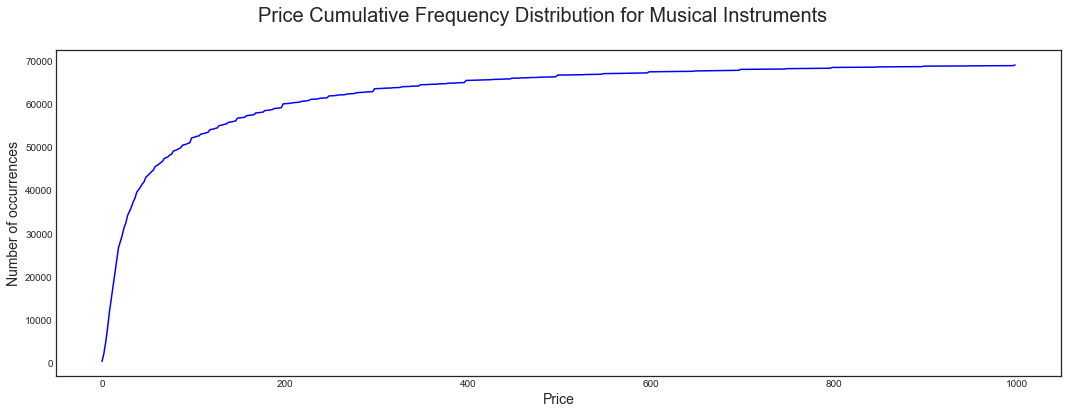

In [17]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax =plt.subplots(figsize=(18,6))

# evaluate the histogram
values, base = np.histogram(list(pricesMI.values()), bins=500)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')

fig.suptitle('Price Cumulative Frequency Distribution for Musical Instruments', fontsize=20)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of occurrences', fontsize=14)

plt.show()

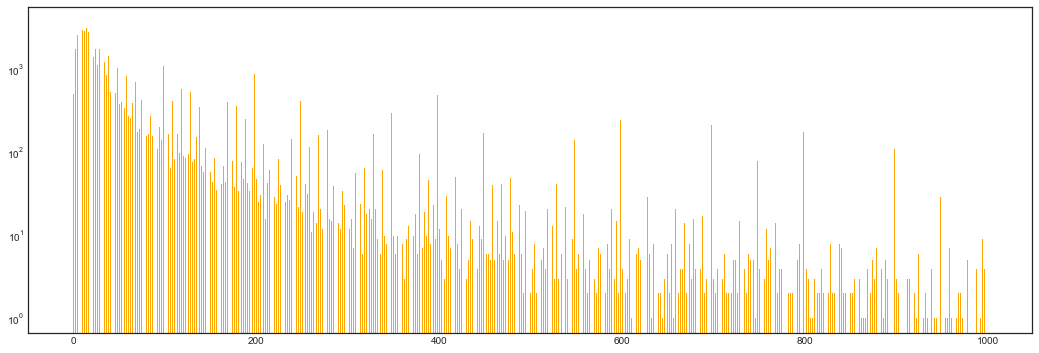

In [18]:
fig, ax =plt.subplots(figsize=(18,6))

plt.bar(base[:-1],values, color='orange', alpha=1)
ax.set_yscale('log')

plt.show()

Price per product available on Amazon. 

As expected, when the prices increase, the frequencies fluctuate consequently. 

This is the result of uneven distribution of prices between ranges of same size.

The number of music with a price of 0 is non-negligable. This might be explained by the fact that music can be free.

Let's focus for the moment on the distribution of prices for the music industry:

In [19]:
metadata_files=[x[8:].replace('.csv', '.json.gz') for x in rating_files]

Using a for loop, we read the price value, if it exists, for each review of the *metadata.json.gz* file.

(This step takes about 30 sec.)

In [20]:
pricesDM = {}

for review in parse("data/metadata/meta_Digital_Music.json.gz"):
    review = json.loads(review)
    try:
        pricesDM[review['asin']]=review['price'] 
    except KeyError:
        pass

In [21]:
pricesCDV = {}

for review in parse("data/metadata/meta_CDs_and_Vinyl.json.gz"):
    review = json.loads(review)
    try:
        pricesCDV[review['asin']]=review['price'] 
    except KeyError:
        pass

We plot the distribution of the prices for every product of the categories linked to music.

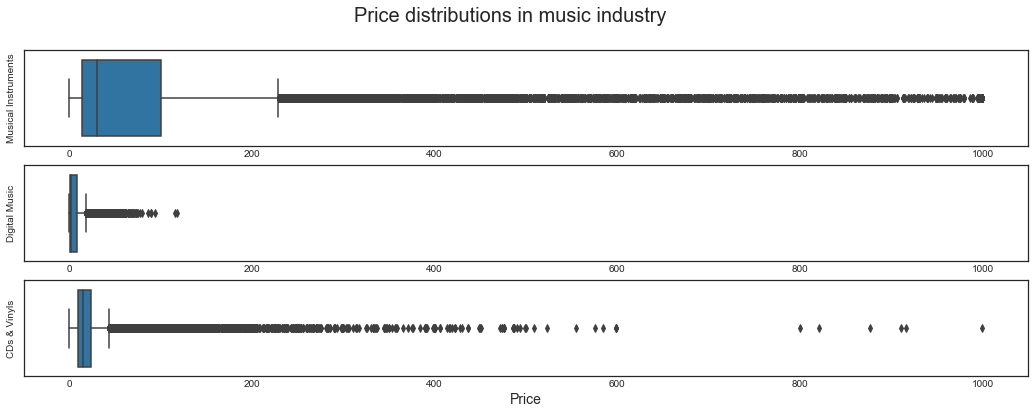

In [22]:
fig, ax =plt.subplots(3,1, figsize=(18,6))

sns.boxplot(list(pricesMI.values()), orient = "h", ax=ax[0])
sns.boxplot(list(pricesDM.values()), orient = "h", ax=ax[1])
sns.boxplot(list(pricesCDV.values()), orient = "h", ax=ax[2])

fig.suptitle('Price distributions in music industry', fontsize=20)
plt.xlabel('Price', fontsize=14)

ax[0].set_xlim([-50,max(pricesMI.values())+50])
ax[1].set_xlim([-50,max(pricesMI.values())+50])
ax[2].set_xlim([-50,max(pricesMI.values())+50])

ax[0].set_ylabel('Musical Instruments')
ax[1].set_ylabel('Digital Music')
ax[2].set_ylabel('CDs & Vinyls')


plt.show()

For the entire dataset in mypath:

In [23]:
prices_all={}
l_all = []

metadata_files=[x[8:].replace('.csv', '.json.gz') for x in rating_files]

for i in range(num_categories):
    for review in parse("data/metadata/meta_" + metadata_files[i]):
        review = json.loads(review)
        try:
            prices_all[review['asin']]=float(review['price'])
        except KeyError:
            pass
    l_all.append(list(prices_all.values()))

In [24]:
lv=[]
lb=[]
lc=[]

for i in range(num_categories):
    #value, base = np.histogram(sorted(l_all[i]), bins=5000)
    value, base = np.histogram(sorted(l_all[i]), bins=5000, normed=True)
    lv.append(value)
    lb.append(base[:-1])
    
    cumulative = np.cumsum(value)
    lc.append(cumulative)

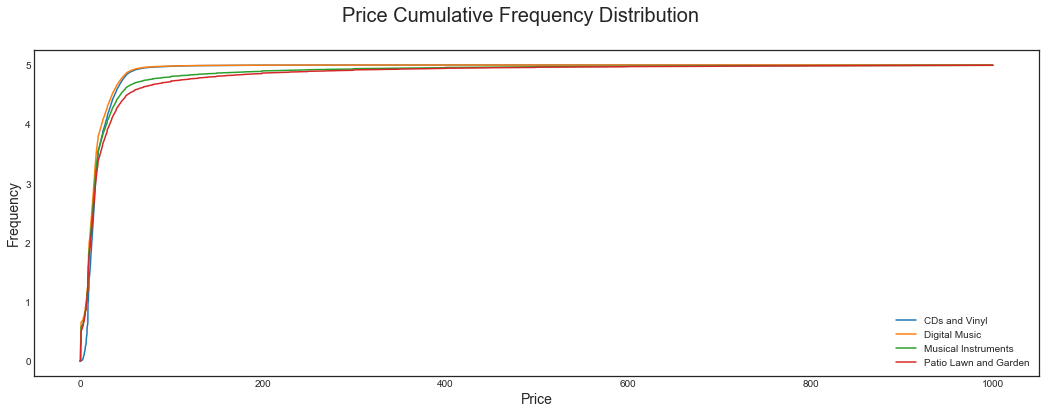

In [25]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(18,6))

ax = fig.add_subplot(111)

for i in range(num_categories):    
    ax.plot(lb[i],lc[i],linestyle='-')

fig.suptitle('Price Cumulative Frequency Distribution', fontsize=20)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

ax.legend(rating_categories)

plt.show()

**Reviews vs Price**

Count the number of reviews by counting every occurences of each product, *asin*, for Music Instruments.

In [26]:
c = Counter()

for i in range(num_categories):
    ci = Counter(rating_df[i]['asin'])
    c += ci

Now, we count the total number of reviews *c[i]* per price, considering the products with a price in their description. We are now considering only the 3 categories from the music industry.

In [27]:
cntMI = Counter()
cntDM = Counter()
cntCDV = Counter()

for i in pricesDM.keys():
    cntDM[pricesDM[i]] += c[i]
    
for i in pricesMI.keys():
    cntMI[pricesMI[i]] += c[i]
    
for i in pricesCDV.keys():
    cntCDV[pricesCDV[i]] += c[i]

The following scatter plot represent the overall trend between the prices and the number of reviews. The relationship described below corresponds to the values computed with histogram. We thus have one value per price range (bin width).

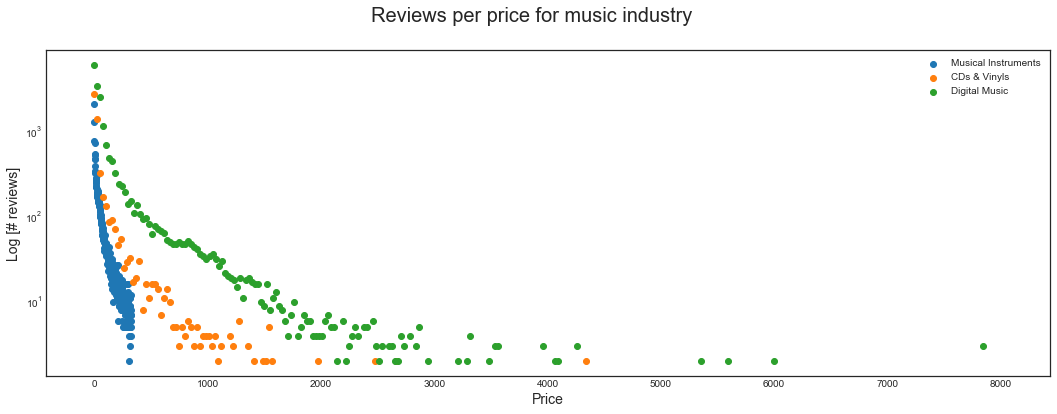

In [28]:
fig, ax =plt.subplots(figsize=(18,6))

value, base = np.histogram(sorted(cntMI.items()), bins=5000)
plt.scatter(base[:300], value[:300])
value, base = np.histogram(sorted(cntDM.items()), bins=5000)
plt.scatter(base[:300], value[:300])
value, base = np.histogram(sorted(cntCDV.items()), bins=5000)
plt.scatter(base[:300], value[:300])
ax.set_yscale('log')

fig.suptitle('Reviews per price for music industry', fontsize=20)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Log [# reviews]', fontsize=14)
ax.legend({'Musical Instruments', 'Digital Music', 'CDs & Vinyls'})

plt.show()

On the contrary, the scatterplot below shows the entire set of points (price, n° reviews). This time we have one value per product. The overall trend is still visible.

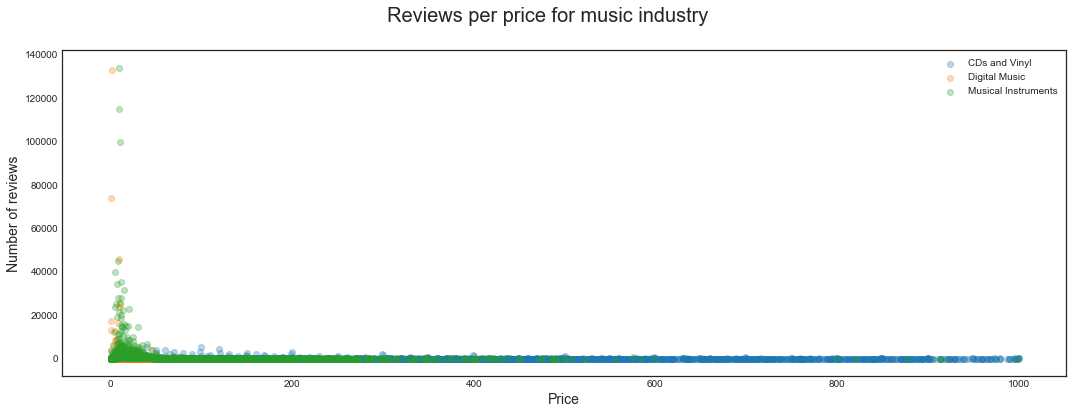

In [29]:
fig, ax =plt.subplots(figsize=(18,6))

plt.scatter(list(cntMI.keys()),list(cntMI.values()), alpha=0.3)
plt.scatter(list(cntDM.keys()),list(cntDM.values()), alpha=0.3)
plt.scatter(list(cntCDV.keys()),list(cntCDV.values()), alpha=0.3)

fig.suptitle('Reviews per price for music industry', fontsize=20)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)
ax.legend(rating_categories)

plt.show()

Now, we count the total number of reviews *c[i]* per price, considering the products with a price in their description.

In [30]:
cnt_all = Counter()

for i in prices_all.keys():
    cnt_all[prices_all[i]] += c[i]

On the contrary, the scatterplot below shows the entire set of points (price, n° reviews). This time we have one value per product. The overall trend is still visible.

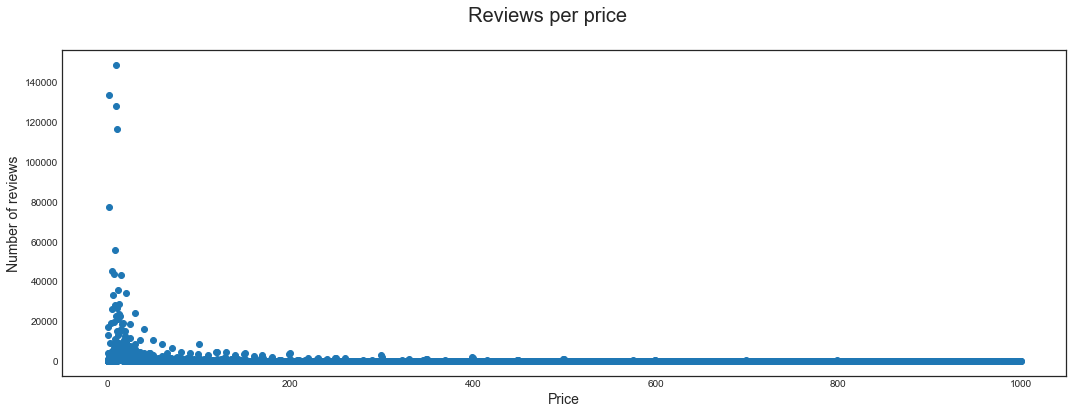

In [31]:
fig, ax =plt.subplots(figsize=(18,6))

plt.scatter(list(cnt_all.keys()),list(cnt_all.values()))

fig.suptitle('Reviews per price', fontsize=20)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)

plt.show()

#### Q3: Relation between category of the product and the amount of reviews.

Boxplot of reviews per product per category.

In [32]:
count = Counter()
li=[]

for i in range(num_categories):
    li.append(list(Counter(rating_df[i]['asin']).values()))

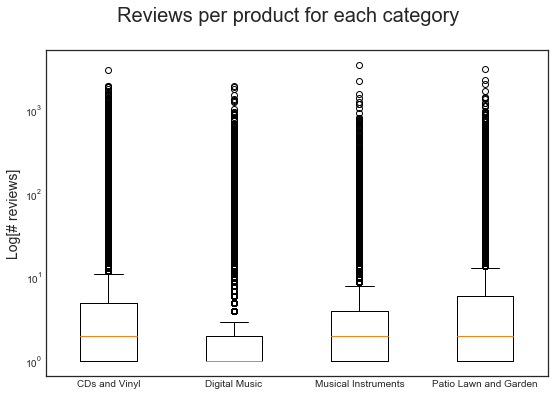

In [33]:
import seaborn as sns
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(li)
ax.set_yscale('log')
ax.set_xticklabels(rating_categories)

fig.suptitle('Reviews per product for each category', fontsize=20)
plt.ylabel('Log[# reviews]', fontsize=14)

plt.show()